## CSE202 - Disign and Analysis of Algorithms - Week 1 - Overview

日期：2022-09-21

姓名：Yubo Cai

课程：CSE202 - Disign and Analysis of Algorithms 高级算法设计与分析

<img src="https://raw.githubusercontent.com/adimajo/CSE204-2021/master/data/logo.jpg" style="float: left; width: 15%" />

In [1]:
from sympy.matrices import randMatrix
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math
import sympy as sym

### Experimental Determination of (Polynomial) Complexity

If the time for a computation grows like $C(n) \sim K n^\alpha \log ^p n$ 

then doubling $n$ should take time $C(2 n) \sim K 2^\alpha n^\alpha \log ^p n$ 

so that $\alpha \approx \log _2 \frac{C(2 n)}{C(n)}$

#### Example: matrix multiplication

In [7]:
def testMatrixMul(size, nbtests):
    total = 0
    for i in range(nbtests):
        A = randMatrix(size) * 1.
        B = randMatrix(size) * 1.

        def doit():
            return A * B

        total += timeit.timeit(doit, number=1)
    return total / nbtests


# 我们打印出矩阵乘法的时间
time = []
for n in range(10, 90, 10):
    time.append(testMatrixMul(n, 10))

for i in range(len(time)):
    print(10 + i * 10, time[i])

print(math.log(2, time[1] / time[0]))
print(math.log(2, time[3] / time[1]))
print(math.log(2, time[7] / time[3]))


10 0.009209038900007727
20 0.06633043079996241
30 0.20833230520000826
40 0.30689427219998605
50 0.5600206662000119
60 0.9706092546000036
70 1.6901699580000127
80 2.5314794677999997
0.35105599833838635
0.4524889091182898
0.3284970726414696


我们发现矩阵相乘的时间复杂度是 $O(n^3)$，主要原因是矩阵相乘的程序中用到了3个for循环的嵌套, 从上面的实验结果可以看出来基本比值在3左右

### Binary Powering 1. Model

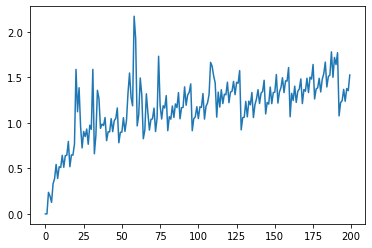

In [14]:
def binpow(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    tmp = binpow(x, n // 2)
    tmp = tmp * tmp
    if n % 2 == 0:
        return tmp
    return tmp * x


def test(size, maxpow):
    A = randMatrix(size) * 1.
    val = [0 for i in range(maxpow)]
    for i in range(maxpow):

        def doit():
            return binpow(A, i)

        val[i] = timeit.timeit(doit, number=3)
    return val


time = test(20,200)
# 我们打印出矩阵乘法的时间, 然后画出图像
plt.plot(time)

### Binary Powering 3. Analysis

算法如下
$$
C(n)=1+\left\{\begin{array}{ll}
C(n / 2), & \text { for even } n>0 \\
C((n-1) / 2)+1, & \text { for odd } n>1
\end{array} \quad \text { with } C(0)=C(1)=0\right.
$$

我们可以通过数学归纳法去证明这个算法的正确性，分别分析奇数和偶数的情况，由于$\lambda(\frac{n+1}{2}) = \lambda(n+1)$，因为是2进制除以2的话相当于右移一位。我们可以找到这个算法的计算次数是 

$$
\text { Lemma. For } n \geq 1, C(n)=\left\lfloor\log _2 n\right\rfloor-1+\lambda(n)0
$$
这里$\lambda(n)$是指把数字转化成二进制中1的个数. 例如 82 = 1010010, $\lambda(82)=3$，因此mult的个数是6-1+3=8. 由此公式最后的出来$C(n)$的范围是
$$
\left\lfloor\log _2 n\right\rfloor \leq C(n) \leq 2\left\lfloor\log _2 n\right\rfloor
$$
因为$\lambda(n)$的范围是
$$
0 \leq \lambda(n) \leq \left\lfloor\log _2 n\right\rfloor
$$

### Complexity of a Problem

The complexity of a problem is that of the most efficient (possibly unknown) algorithm that solves it.

Sorting elements has complexity $O(n \log n)$ comparisons.

例如，排序的复杂度是$O(n \log n)$，因为最快的排序算法是归并排序，归并排序的复杂度是$O(n \log n)$

Proof. $k$ comparisons cannot distinguish more than $2^k$ permutations and $\log _2 n ! \sim n \log _2 n$

### Homework

In [2]:
def function1(x):
    # function is loglog(x) - logloglog(x) = 0
    return sym.log(sym.log(x, 2), 2) - sym.log(sym.log(sym.log(x, 2), 2), 2)

x = sym.symbols('x')
print(sym.solve(function1(x)))

[-LambertW(-log(2))/log(2)]
